<a href="https://colab.research.google.com/github/S-Ahsan-Haider/Case-Studies/blob/main/PySpark_Jamboree_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('admission').getOrCreate()

In [3]:
spark

In [36]:
df = spark.read.csv(r'/content/Jamboree_Admission.csv', inferSchema=True, header = True)

In [6]:
df.count()

500

In [7]:
df.printSchema()

root
 |-- Serial No.: integer (nullable = true)
 |-- GRE Score: integer (nullable = true)
 |-- TOEFL Score: integer (nullable = true)
 |-- University Rating: integer (nullable = true)
 |-- SOP: double (nullable = true)
 |-- LOR : double (nullable = true)
 |-- CGPA: double (nullable = true)
 |-- Research: integer (nullable = true)
 |-- Chance of Admit : double (nullable = true)



In [37]:
# Dropping Serial Number
df = df.drop('Serial No.')

In [38]:
# Renaming Columns
names = [('GRE Score', 'gre'), ('TOEFL Score', 'toefl'), ('University Rating', 'univ'), ('SOP', 'sop'), ('LOR ', 'lor'), ('CGPA', 'cgpa'), ('Research', 'research'), ('Chance of Admit ', 'chances')]
for i,j in names:
  df = df.withColumnRenamed(i,j)

In [14]:
df.show(3)

+---+-----+----+---+---+----+--------+-------+
|gre|toefl|univ|sop|lor|cgpa|research|chances|
+---+-----+----+---+---+----+--------+-------+
|337|  118|   4|4.5|4.5|9.65|       1|   0.92|
|324|  107|   4|4.0|4.5|8.87|       1|   0.76|
|316|  104|   3|3.0|3.5| 8.0|       1|   0.72|
+---+-----+----+---+---+----+--------+-------+
only showing top 3 rows



In [15]:
df.select(['gre','toefl']).describe().show()

+-------+------------------+-----------------+
|summary|               gre|            toefl|
+-------+------------------+-----------------+
|  count|               500|              500|
|   mean|           316.472|          107.192|
| stddev|11.295148372354712|6.081867659564538|
|    min|               290|               92|
|    max|               340|              120|
+-------+------------------+-----------------+



In [19]:
# Null Vlaues -------------------------------------------------------

from pyspark.sql.functions import col, sum

n = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
n.show()

+---+-----+----+---+---+----+--------+-------+
|gre|toefl|univ|sop|lor|cgpa|research|chances|
+---+-----+----+---+---+----+--------+-------+
|  0|    0|   0|  0|  0|   0|       0|      0|
+---+-----+----+---+---+----+--------+-------+



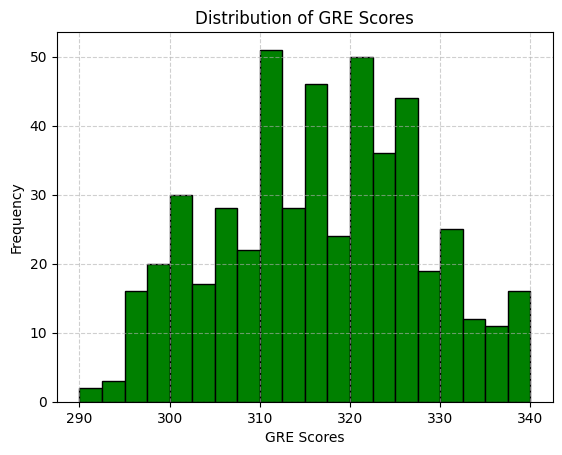

In [24]:
import matplotlib.pyplot as plt

g_plot = df.select('gre').rdd.flatMap(lambda x: x).collect()      # Careful while running collect() memory constraints

plt.hist(g_plot, bins=20, edgecolor = 'black', color='green')
plt.xlabel('GRE Scores')
plt.ylabel('Frequency')
plt.title('Distribution of GRE Scores')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

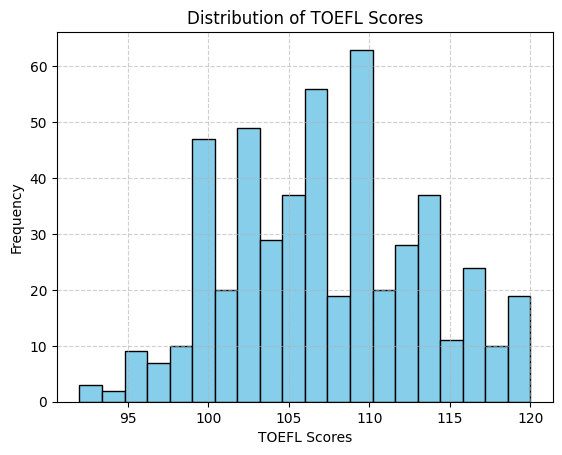

In [25]:
import matplotlib.pyplot as plt

g_plot = df.select('toefl').rdd.flatMap(lambda x: x).collect()      # Careful while running collect() memory constraints

plt.hist(g_plot, bins=20, edgecolor = 'black', color='skyblue')
plt.xlabel('TOEFL Scores')
plt.ylabel('Frequency')
plt.title('Distribution of TOEFL Scores')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [29]:
df.show(3)

+---+-----+----+---+---+----+--------+-------+
|gre|toefl|univ|sop|lor|cgpa|research|chances|
+---+-----+----+---+---+----+--------+-------+
|337|  118|   4|4.5|4.5|9.65|       1|   0.92|
|324|  107|   4|4.0|4.5|8.87|       1|   0.76|
|316|  104|   3|3.0|3.5| 8.0|       1|   0.72|
+---+-----+----+---+---+----+--------+-------+
only showing top 3 rows



In [41]:
from pyspark.sql.functions import col, max

# Scaling Column and creating a new Dataframe for that

m = df.agg(max(col('gre'))).collect()[0][0]
dfs = df.withColumn('gre_s', col('gre') / m)

m = df.agg(max(col('toefl'))).collect()[0][0]
dfs = dfs.withColumn('toefl_s', col('toefl') / m)

m = df.agg(max(col('univ'))).collect()[0][0]
dfs = dfs.withColumn('univ_s', col('univ') / m)

m = df.agg(max(col('sop'))).collect()[0][0]
dfs = dfs.withColumn('sop_s', col('sop') / m)

m = df.agg(max(col('lor'))).collect()[0][0]
dfs = dfs.withColumn('lor_s', col('lor') / m)

m = df.agg(max(col('cgpa'))).collect()[0][0]
dfs = dfs.withColumn('cgpa_s', col('cgpa') / m)

# Dropping unscaled columns

dfs = dfs.drop('gre')
dfs = dfs.drop('toefl')
dfs = dfs.drop('univ')
dfs = dfs.drop('sop')
dfs = dfs.drop('lor')
dfs = dfs.drop('cgpa')

# Final Dataframe

dfs.show(3)

+--------+-------+------------------+------------------+------+-----+-----+------------------+
|research|chances|             gre_s|           toefl_s|univ_s|sop_s|lor_s|            cgpa_s|
+--------+-------+------------------+------------------+------+-----+-----+------------------+
|       1|   0.92|0.9911764705882353|0.9833333333333333|   0.8|  0.9|  0.9|0.9727822580645161|
|       1|   0.76|0.9529411764705882|0.8916666666666667|   0.8|  0.8|  0.9|0.8941532258064515|
|       1|   0.72|0.9294117647058824|0.8666666666666667|   0.6|  0.6|  0.7|0.8064516129032259|
+--------+-------+------------------+------------------+------+-----+-----+------------------+
only showing top 3 rows



In [46]:
# Finding the correlation between the given numerical data columns

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

num = [field.name for field in dfs.schema if field.dataType not in ('string', 'boolean')]

assembler = VectorAssembler(inputCols=num, outputCol="features")
vector_df = assembler.transform(dfs).select("features")

cor_mat = Correlation.corr(vector_df, "features").head()[0]

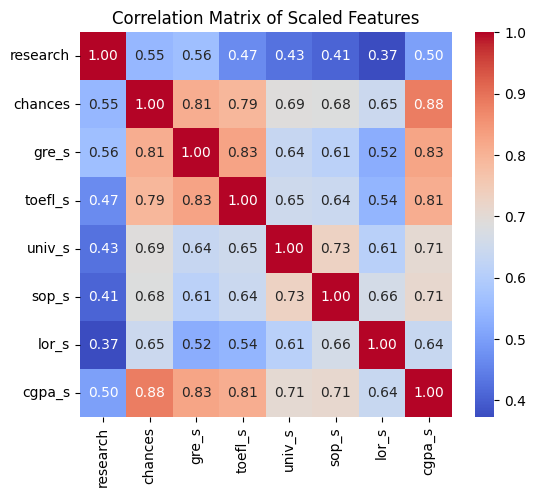

In [53]:
# Plotting the Correlation Matrix using Seaborn

import pandas as pd
import seaborn as sns

cor_mat = cor_mat.toArray()
cor_df = pd.DataFrame(cor_mat, columns=num, index=num)

plt.figure(figsize=(6,5))
sns.heatmap(cor_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scaled Features')
plt.show()

In [54]:
# Finding how many students have experience with research

from pyspark.sql.functions import count

r_count = df.groupBy('research').agg(count('*').alias('count'))
r_count.show()

+--------+-----+
|research|count|
+--------+-----+
|       1|  280|
|       0|  220|
+--------+-----+



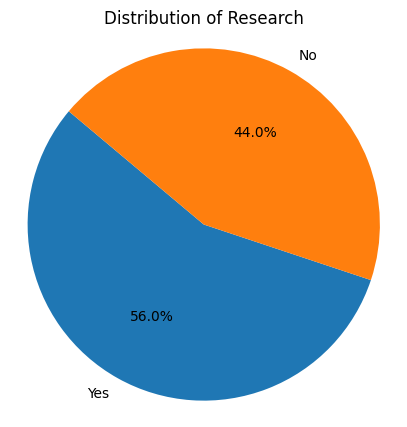

In [52]:
# Collecting the data to the driver node and plotting a pie chart

data_temp = r_count.collect()

labels = ['Yes' if row['research'] == 1 else 'No' for row in data_temp]
sizes = [row['count'] for row in data_temp]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Research')
plt.axis('equal')
plt.show()

In [64]:
from pyspark.sql import functions as F

boxplot_stats1 = df.agg(
    F.min(F.col('cgpa')).alias('min'),
    F.expr('percentile_approx(cgpa, 0.25)').alias('Q1'),
    F.expr('percentile_approx(cgpa, 0.50)').alias('median'),
    F.expr('percentile_approx(cgpa, 0.75)').alias('Q3'),
    F.max(F.col('cgpa')).alias('max')
)
print('CGPA stats')
boxplot_stats1.show()

boxplot_stats2 = df.agg(
    F.min(F.col('chances')).alias('min'),
    F.expr('percentile_approx(chances, 0.25)').alias('Q1'),
    F.expr('percentile_approx(chances, 0.50)').alias('median'),
    F.expr('percentile_approx(chances, 0.75)').alias('Q3'),
    F.max(F.col('chances')).alias('max')
)
print('Admission Chances stats')
boxplot_stats2.show()

CGPA stats
+---+----+------+----+----+
|min|  Q1|median|  Q3| max|
+---+----+------+----+----+
|6.8|8.12|  8.56|9.04|9.92|
+---+----+------+----+----+

Admission Chances stats
+----+----+------+----+----+
| min|  Q1|median|  Q3| max|
+----+----+------+----+----+
|0.34|0.63|  0.72|0.82|0.97|
+----+----+------+----+----+



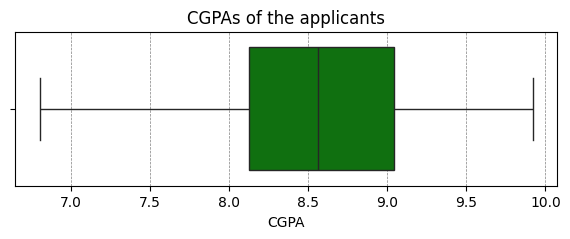

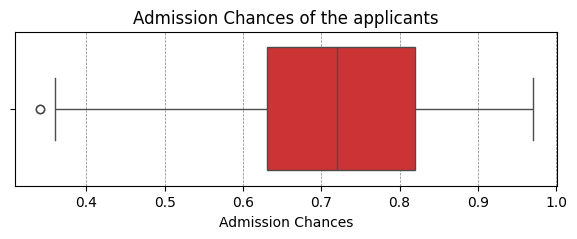

In [63]:
# Collecting and plotting the data from the PySpark DataFrame to the driver node


# CGPA

data_temp = df.select('cgpa').rdd.flatMap(lambda x: x).collect()
df_pd = pd.DataFrame({'cgpa': data_temp})

plt.figure(figsize=(7, 2))
sns.boxplot(x='cgpa', data=df_pd, color='green')
sns.set_palette("Set1")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='x')
plt.title('CGPAs of the applicants')
plt.xlabel('CGPA')
plt.show()


# Admission Chances

data_temp = df.select('chances').rdd.flatMap(lambda x: x).collect()
df_pd = pd.DataFrame({'chances': data_temp})

plt.figure(figsize=(7, 2))
sns.boxplot(x='chances', data=df_pd)
sns.set_palette("Set1")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='x')
plt.title('Admission Chances of the applicants')
plt.xlabel('Admission Chances')
plt.show()

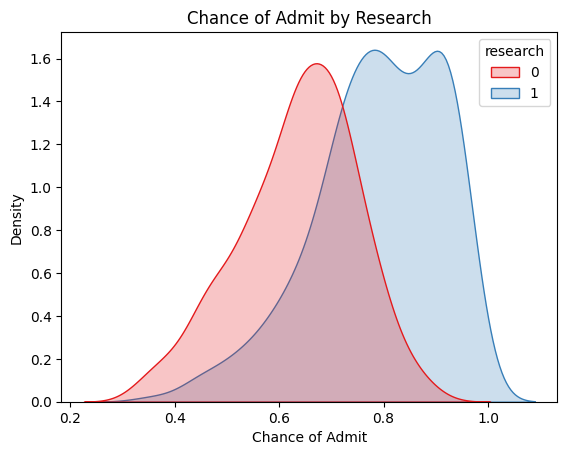

In [78]:
# Collecting the necessary data to the driver node for plotying distribution

df_pd = df.select(['chances', 'research']).toPandas()


sns.kdeplot(data=df_pd, x='chances', hue='research', fill=True)
plt.title('Chance of Admit by Research')
plt.xlabel('Chance of Admit')
plt.ylabel('Density')
plt.show()

In [79]:
# Performing Independeddnt T-Test using Scipy-Stats for the aboev

import scipy.stats as stats

research = df.filter(df['research'] == 1).select('chances').rdd.flatMap(lambda x: x).collect()
no_research = df.filter(df['research'] == 0).select('chances').rdd.flatMap(lambda x: x).collect()

t, p = stats.ttest_ind(research, no_research)

print('P-value is:', p,'\n')

if p < 0.05:
    print('The means of the two groups are significantly different.')
else:
    print('The means of the two groups are not significantly different.')

P-value is: 3.5954935458409782e-40 

The means of the two groups are significantly different.


**ML Model to Predict Admission Chances**

In [81]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [82]:
dfs.show(3)

+--------+-------+------------------+------------------+------+-----+-----+------------------+
|research|chances|             gre_s|           toefl_s|univ_s|sop_s|lor_s|            cgpa_s|
+--------+-------+------------------+------------------+------+-----+-----+------------------+
|       1|   0.92|0.9911764705882353|0.9833333333333333|   0.8|  0.9|  0.9|0.9727822580645161|
|       1|   0.76|0.9529411764705882|0.8916666666666667|   0.8|  0.8|  0.9|0.8941532258064515|
|       1|   0.72|0.9294117647058824|0.8666666666666667|   0.6|  0.6|  0.7|0.8064516129032259|
+--------+-------+------------------+------------------+------+-----+-----+------------------+
only showing top 3 rows



In [90]:
XX = ['research','gre_s','toefl_s','univ_s','sop_s','lor_s','cgpa_s']
YY = 'chances'

asmblr = VectorAssembler(inputCols=XX, outputCol='x')

df_temp = asmblr.transform(dfs)

df_temp.show(3)

+--------+-------+------------------+------------------+------+-----+-----+------------------+--------------------+
|research|chances|             gre_s|           toefl_s|univ_s|sop_s|lor_s|            cgpa_s|                   x|
+--------+-------+------------------+------------------+------+-----+-----+------------------+--------------------+
|       1|   0.92|0.9911764705882353|0.9833333333333333|   0.8|  0.9|  0.9|0.9727822580645161|[1.0,0.9911764705...|
|       1|   0.76|0.9529411764705882|0.8916666666666667|   0.8|  0.8|  0.9|0.8941532258064515|[1.0,0.9529411764...|
|       1|   0.72|0.9294117647058824|0.8666666666666667|   0.6|  0.6|  0.7|0.8064516129032259|[1.0,0.9294117647...|
+--------+-------+------------------+------------------+------+-----+-----+------------------+--------------------+
only showing top 3 rows



In [91]:
data = df_temp.select('x', YY)

data.show(3)

+--------------------+-------+
|                   x|chances|
+--------------------+-------+
|[1.0,0.9911764705...|   0.92|
|[1.0,0.9529411764...|   0.76|
|[1.0,0.9294117647...|   0.72|
+--------------------+-------+
only showing top 3 rows



In [93]:
# Model training

train_data, test_data = data.randomSplit([0.8,0.2], seed=49)

lr = LinearRegression(featuresCol='x', labelCol='chances')

moda = lr.fit(train_data)

y_ = moda.transform(test_data)

print("Coefficients:", moda.coefficients)
print()
print("Intercepts:", moda.intercept)

Coefficients: [0.01665485335548387,0.7014735257863097,0.34576084049369205,0.02760472009707319,0.009988486262683841,0.0730719476768622,1.220263478967906]

Intercepts: -1.3800152910479169


In [100]:
# Model Evaluation

from pyspark.ml.evaluation import RegressionEvaluator

eva = RegressionEvaluator(labelCol='chances', predictionCol='prediction', metricName='rmse')  # 'prediction' is auto-genrated by moda
rmse = eva.evaluate(y_)
print("RMSE is:", rmse, "\n")

eva = RegressionEvaluator(labelCol='chances', predictionCol='prediction', metricName='r2')
r2 = eva.evaluate(y_)
print("R-Squared is:", r2, "\n")

RMSE is: 0.06334797624595048 

R-Squared is: 0.76904277543939 

